In [74]:
import shutil
import matplotlib.pyplot as plt
from sklearn.utils import resample
import numpy as np 
import pandas as pd 
import os 
from os import listdir
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical
from tqdm import tqdm
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
%matplotlib inline

In [75]:
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = list()
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

In [114]:
benign=getListOfFiles('C:/KOUSHIK/CROSS_VALIDATION/DataSet/Colorectal Cancer/NCT-CRC-HE-100K-NONORM/NORM')
malignent=getListOfFiles('C:/KOUSHIK/CROSS_VALIDATION/DataSet/Colorectal Cancer/NCT-CRC-HE-100K-NONORM/TUM')

In [115]:
data = pd.DataFrame(index=np.arange(0, len(benign)+len(malignent)), columns=["image", "target"])
k=0
for c in [0,1]:
    if c==1:
        for m in range(len(benign)):
            data.iloc[k]["image"] = benign[m]
            data.iloc[k]["target"] = 0
            k+=1
    else:
        for m in range(len(malignent)):
            data.iloc[k]["image"] = malignent[m]
            data.iloc[k]["target"] = 1
            k+=1

In [116]:
data["target"].value_counts()

1    14317
0     8763
Name: target, dtype: int64

In [117]:
train_image=[]
y=[]

In [118]:
for i in tqdm(range(data.shape[0])):
    img = image.load_img(data['image'].iloc[i], target_size=(28,28,1), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

100%|██████████| 23080/23080 [03:21<00:00, 114.39it/s]


# Start BreaKHisTest Dataset

In [119]:
breakhis_benign=getListOfFiles('C:/KOUSHIK/CROSS_VALIDATION/DataSet/BreaKHisBin/Benign')
breakhis_malignent=getListOfFiles('C:/KOUSHIK/CROSS_VALIDATION/DataSet/BreaKHisBin/Malignant')

In [120]:
breakHis_data = pd.DataFrame(index=np.arange(0, len(breakhis_benign)+len(breakhis_malignent)), columns=["image", "target"])
k=0
for c in [0,1]:
    if c==1:
        for m in range(len(breakhis_benign)):
            breakHis_data.iloc[k]["image"] = breakhis_benign[m]
            breakHis_data.iloc[k]["target"] = 0
            k+=1
    else:
        for m in range(len(breakhis_malignent)):
            breakHis_data.iloc[k]["image"] = breakhis_malignent[m]
            breakHis_data.iloc[k]["target"] = 1
            k+=1

In [121]:
breakHis_data["target"].value_counts()

1    1370
0     625
Name: target, dtype: int64

In [122]:
breaKHis_image=[]
breaKHis_y=[]

In [123]:
for i in tqdm(range(breakHis_data.shape[0])):
    img = image.load_img(breakHis_data['image'].iloc[i], target_size=(28,28,1), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    breaKHis_image.append(img)

100%|██████████| 1995/1995 [00:54<00:00, 36.52it/s]


In [124]:
X_breaKHis_test = np.array(breaKHis_image)
y_breaKHis_test = data.iloc[:,-1].values

# End BreakHis Test Data

In [125]:
X = np.array(train_image)
y = data.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=42, test_size=0.2, shuffle=True)

In [126]:
Y_train = keras.utils.np_utils.to_categorical(y_train, 2)
Y_test = keras.utils.np_utils.to_categorical(y_test, 2)
Y_val = keras.utils.np_utils.to_categorical(y_val, 2)

In [127]:
X_train.shape, X_test.shape, X_val.shape

((18464, 28, 28, 3), (3692, 28, 28, 3), (924, 28, 28, 3))

In [128]:
model = Sequential()
model.add(Conv2D(30, kernel_size = (5,5), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,3)))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Flatten())

model.add(Dense(150, activation='relu'))
model.add(Dense(75, activation='relu'))

model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(X_train, Y_train, batch_size=10, epochs=10, validation_data=(X_val, Y_val))

Epoch 1/10
1847/1847 [==============================] - 9s 4ms/step - loss: 0.6457 - accuracy: 0.6428 - val_loss: 0.5676 - val_accuracy: 0.6797
Epoch 2/10
1847/1847 [==============================] - 10s 6ms/step - loss: 0.5246 - accuracy: 0.7245 - val_loss: 0.5165 - val_accuracy: 0.7478
Epoch 3/10
1847/1847 [==============================] - 8s 4ms/step - loss: 0.5140 - accuracy: 0.7451 - val_loss: 0.4865 - val_accuracy: 0.7760
Epoch 4/10
1847/1847 [==============================] - 8s 5ms/step - loss: 0.4883 - accuracy: 0.7637 - val_loss: 0.4894 - val_accuracy: 0.7478
Epoch 5/10
1847/1847 [==============================] - 10s 5ms/step - loss: 0.4585 - accuracy: 0.7833 - val_loss: 0.4597 - val_accuracy: 0.7857
Epoch 6/10
1847/1847 [==============================] - 8s 5ms/step - loss: 0.4232 - accuracy: 0.7997 - val_loss: 0.4454 - val_accuracy: 0.8084
Epoch 7/10
1847/1847 [==============================] - 11s 6ms/step - loss: 0.4010 - accuracy: 0.8132 - val_loss: 0.5224 - val_accura

<AxesSubplot:>

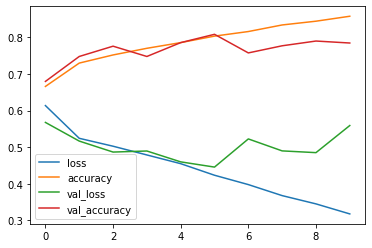

In [129]:
history_df = pd.DataFrame(history.history)
history_df.plot()

In [130]:
y_pred = model.predict_classes(X_test)
acc_test = 0

for i in range(X_test.shape[0]):
    if(y_pred[i]==y_test[i]):
        acc_test= acc_test+1
print("Accuracy Test:", acc_test/X_test.shape[0]*100)

C:\Users\khowlade\Anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy Test: 78.00650054171182


# Start BreaKHis Accuracy

In [131]:
y_br_pred = model.predict_classes(X_breaKHis_test)
acc_test = 0

for i in range(X_breaKHis_test.shape[0]):
    if(y_br_pred[i]==y_breaKHis_test[i]):
        acc_test= acc_test+1
print("Accuracy Test:", acc_test/X_breaKHis_test.shape[0]*100)

Accuracy Test: 80.0


# end BreaKHis Accuracy 